## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
# Import the required libraries
import psycopg2
import os
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as go 


### Connect to database

In [2]:
# Connecting to the database
postgre_db = 'mid_term_project'
postgre_user = 'lhl_student'
postgre_password = 'lhl_student'
postgre_host = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com'
postgre_port = '5432'


In [3]:
con = psycopg2.connect(database = postgre_db,
                       user= postgre_user, 
                       password= postgre_password, 
                       host= postgre_host, 
                       port= postgre_port)

In [4]:
def execute_read_query(connection, query, return_pandas=True):
    cursor = connection.cursor()
    result = None
    try:
        if return_pandas:
            result = pd.read_sql_query(query, connection)
        else:
            cursor.execute(query)
            result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [5]:
flight_query = """
                    SELECT * FROM flights
                    ORDER BY RANDOM()
                    LIMIT 5000;            
                   """
flight_data = execute_read_query(con,flight_query)
flight_data

/opt/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-19,UA,UA_CODESHARE,UA,6347,YV,N87318,6347,12266,IAH,...,925.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-10-02,AS,AS_CODESHARE,AS,3431,OO,N179SY,3431,14570,RNO,...,444.0,0.0,0.0,0.0,0.0,147.0,None,NaN,NaN,None
2,2019-10-05,AA,AA,AA,676,AA,N721UW,676,11057,CLT,...,290.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-10-05,AS,AS,AS,16,AS,N272AK,16,14747,SEA,...,2554.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-05-15,DL,DL,DL,1714,DL,N537US,1714,13487,MSP,...,1310.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2018-09-25,AS,AS_CODESHARE,AS,2100,QX,N443QX,2100,14747,SEA,...,172.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4996,2018-10-16,WN,WN,WN,859,WN,N8677A,859,12892,LAX,...,1246.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4997,2018-12-14,UA,UA_CODESHARE,UA,4376,EV,N877AS,4376,14524,RIC,...,100.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4998,2018-10-01,WN,WN,WN,871,WN,N266WN,871,11540,ELP,...,677.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


### Create a data frame

In [6]:
df_flight = pd.DataFrame(flight_data)

In [7]:
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-19,UA,UA_CODESHARE,UA,6347,YV,N87318,6347,12266,IAH,...,925.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-10-02,AS,AS_CODESHARE,AS,3431,OO,N179SY,3431,14570,RNO,...,444.0,0.0,0.0,0.0,0.0,147.0,None,NaN,NaN,None
2,2019-10-05,AA,AA,AA,676,AA,N721UW,676,11057,CLT,...,290.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-10-05,AS,AS,AS,16,AS,N272AK,16,14747,SEA,...,2554.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-05-15,DL,DL,DL,1714,DL,N537US,1714,13487,MSP,...,1310.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [8]:
# Check the missing value
df_flight['arr_delay'].isnull().sum()

117

In [9]:
# Replace the null values with mean
delay_mean = df_flight['arr_delay'].astype('float').mean(axis=0)
delay_mean

5.148269506450952

In [10]:
import numpy as np
df_flight['arr_delay'].replace(np.nan, delay_mean, inplace=True)

In [11]:
df_delay = df_flight['arr_delay']
df_delay.head()

0    -18.0
1    147.0
2     -4.0
3     -2.0
4    -22.0
Name: arr_delay, dtype: float64

In [12]:
# Let's use shapiro test which is designed to check the normality of data

from scipy import stats

w,p = stats.shapiro(df_delay)
print('Shapiro-test: w: {0} p ={1}'.format(w,p))


Shapiro-test: w: 0.5257346034049988 p =0.0


Sine the p_value = 0, we can reject the null hypothesis

(-50.0, 100.0)

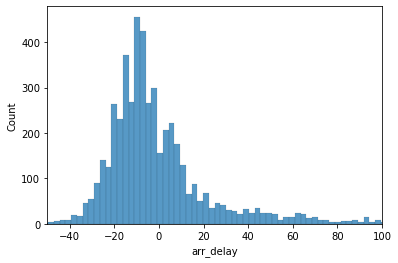

In [13]:
# Let's plot the histogram

import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df_delay)
plt.xlim(-50, 100)

It seems that the arrival delay is not distributed  normally

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [15]:
# For this task we need to pars the 'fl_date' column into month
import datetime
import calendar

In [16]:
df_average = df_flight.copy(deep= True)

In [17]:
df_average['fl_date']=pd.to_datetime(df_average['fl_date'])
df_average['month']=df_average['fl_date'].dt.month_name()

df_average.head()


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
0,2019-11-19,UA,UA_CODESHARE,UA,6347,YV,N87318,6347,12266,IAH,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,November
1,2018-10-02,AS,AS_CODESHARE,AS,3431,OO,N179SY,3431,14570,RNO,...,0.0,0.0,0.0,0.0,147.0,None,NaN,NaN,None,October
2,2019-10-05,AA,AA,AA,676,AA,N721UW,676,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,October
3,2019-10-05,AS,AS,AS,16,AS,N272AK,16,14747,SEA,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,October
4,2019-05-15,DL,DL,DL,1714,DL,N537US,1714,13487,MSP,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,May


In [18]:
df_average['month'].value_counts

<bound method IndexOpsMixin.value_counts of 0        November
1         October
2         October
3         October
4             May
          ...    
4995    September
4996      October
4997     December
4998      October
4999     December
Name: month, Length: 5000, dtype: object>

In [19]:
df_mean_ar =df_average[['month', 'arr_delay']].groupby(['month']).mean()
df_mean_dep = df_average[['month', 'dep_delay']].groupby(['month']).mean()

#df_median=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).median()
#df_median=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).median()
print(df_mean_ar, df_mean_dep)


           arr_delay
month               
April       1.800896
August      7.716272
December    5.714015
February    6.595052
January     6.527215
July        7.204141
June       10.266537
March       2.201861
May         2.808632
November    1.815195
October     7.054147
September   2.495560            dep_delay
month               
April       7.630588
August     11.603627
December   11.437500
February   10.511278
January    13.145000
July       13.301932
June       14.861257
March       7.944591
May         7.854626
November    7.059585
October    11.449383
September   8.526699


In [20]:
df_median_ar = df_average[['month', 'arr_delay']].groupby(['month']).median()
df_median_dep = df_average[['month', 'dep_delay']].groupby(['month']).median()
print(df_mean_ar, df_median_dep)

           arr_delay
month               
April       1.800896
August      7.716272
December    5.714015
February    6.595052
January     6.527215
July        7.204141
June       10.266537
March       2.201861
May         2.808632
November    1.815195
October     7.054147
September   2.495560            dep_delay
month               
April           -3.0
August          -2.0
December        -2.0
February        -2.0
January         -3.0
July            -2.0
June            -1.0
March           -2.0
May             -3.0
November        -3.0
October         -3.0
September       -3.0


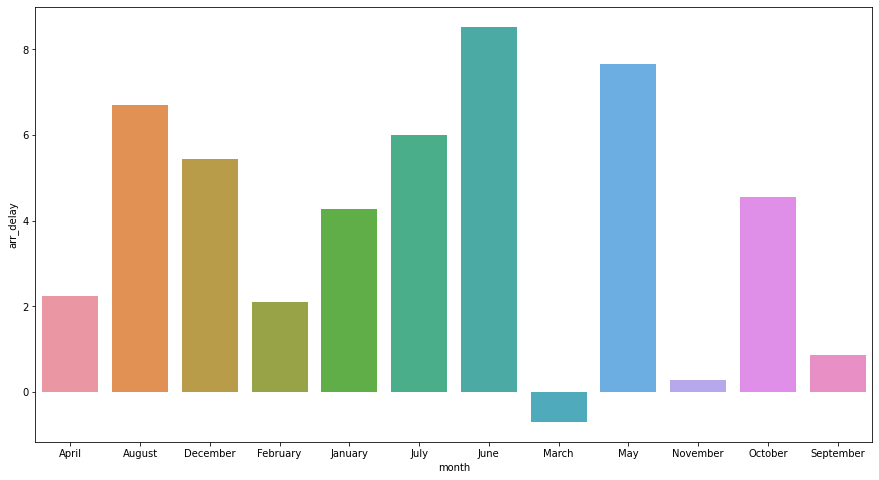

In [26]:

#Monthly arrival delay
fig=plt.subplots(figsize=(15, 8))

sns.barplot(x=df_mean_ar.index, y=df_mean_ar['arr_delay'])

The barplot show that most of arrival flight delays are in June and May

<AxesSubplot:xlabel='month', ylabel='dep_delay'>

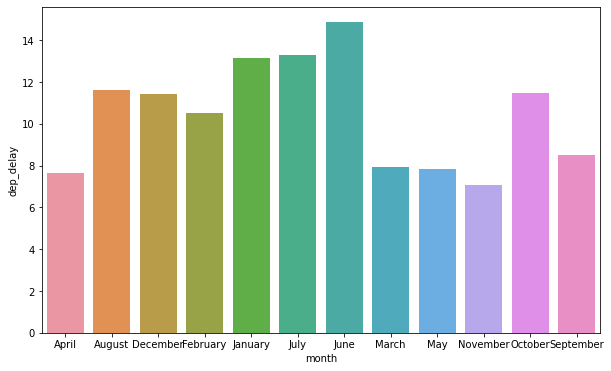

In [21]:
# Monthly departure delay

fig=plt.subplots(figsize=(10, 6))
sns.barplot(x=df_mean_dep.index, y=df_mean_dep['dep_delay'])


Longest departure delay happened in June, July and January

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [22]:
df_taxi = df_flight.copy(deep= True)
df_taxi.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-19,UA,UA_CODESHARE,UA,6347,YV,N87318,6347,12266,IAH,...,925.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-10-02,AS,AS_CODESHARE,AS,3431,OO,N179SY,3431,14570,RNO,...,444.0,0.0,0.0,0.0,0.0,147.0,None,NaN,NaN,None
2,2019-10-05,AA,AA,AA,676,AA,N721UW,676,11057,CLT,...,290.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-10-05,AS,AS,AS,16,AS,N272AK,16,14747,SEA,...,2554.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-05-15,DL,DL,DL,1714,DL,N537US,1714,13487,MSP,...,1310.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [23]:
# First we need to see the taxi_out in origin airport

tax_out =df_taxi.groupby(['origin']).agg({'taxi_out':['count', 'mean']}).reset_index()
tax_out





origin taxi_out           
              count       mean
0      ABE        6  17.333333
1      ABI        3  11.000000
2      ABQ       15  13.800000
3      ABR        1  18.000000
4      ACK        1  12.000000
..     ...      ...        ...
276    TYS       14  15.000000
277    VLD        2  23.500000
278    VPS        4  14.750000
279    WRG        1   4.000000
280    XNA        8  21.125000

[281 rows x 3 columns]

In [24]:
import plotly.express as go
plt.figure(figsize=(12, 8))

fig = go.scatter(x=tax_out[('taxi_out','count')], y=tax_out[('taxi_out', 'mean')], color=tax_out['origin'])
fig.show()




<Figure size 864x576 with 0 Axes>

There is no positive correlation between higher traffic and taxi out time

In [26]:

#Taxi in
#For this part of the question we are going to use destination airport
df_taxi_in  =df_taxi.groupby(['dest']).agg({'taxi_in':['count', 'mean']}).reset_index()
df_taxi_in

dest taxi_in          
           count      mean
0    ABE       6  4.833333
1    ABI       1  5.000000
2    ABQ      18  5.388889
3    ACT       2  5.500000
4    ACV       1  4.000000
..   ...     ...       ...
273  WRG       1  5.000000
274  XNA      10  6.800000
275  XWA       1  4.000000
276  YKM       1  4.000000
277  YUM       1  5.000000

[278 rows x 3 columns]

In [27]:
import plotly.express as go
plt.figure(figsize=(12, 8))

fig = go.scatter(x=df_taxi_in[('taxi_in','count')], y=df_taxi_in[('taxi_in', 'mean')], color= df_taxi_in['dest'])
fig.show()


<Figure size 864x576 with 0 Axes>

In [33]:
df_taxi.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-05-20,UA,UA,UA,2042,UA,N77871,2042,11278,DCA,"Washington, DC",14771,SFO,"San Francisco, CA",753,812.0,19.0,15.0,827.0,1052.0,14.0,1100,1106.0,6.0,0.0,None,0.0,N,367.0,354.0,325.0,1.0,2442.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-11-08,AA,AA_CODESHARE,AA,4862,PT,N617AE,4862,11057,CLT,"Charlotte, NC",13139,LYH,"Lynchburg, VA",1300,1308.0,8.0,26.0,1334.0,1406.0,4.0,1403,1410.0,7.0,0.0,None,0.0,N,63.0,62.0,32.0,1.0,175.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-11-07,DL,DL,DL,2240,DL,N879DN,2240,10299,ANC,"Anchorage, AK",14747,SEA,"Seattle, WA",600,553.0,-7.0,10.0,603.0,1000.0,12.0,1041,1012.0,-29.0,0.0,None,0.0,N,221.0,199.0,177.0,1.0,1448.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-10,AA,AA,AA,1877,AA,N654AW,1877,11057,CLT,"Charlotte, NC",11697,FLL,"Fort Lauderdale, FL",1149,1151.0,2.0,32.0,1223.0,1346.0,4.0,1356,1350.0,-6.0,0.0,None,0.0,N,127.0,119.0,83.0,1.0,632.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-06,NK,NK,NK,814,NK,N639NK,814,14635,RSW,"Fort Myers, FL",10529,BDL,"Hartford, CT",2020,2025.0,5.0,12.0,2037.0,2316.0,8.0,2314,2324.0,10.0,0.0,,0.0,N,174.0,179.0,159.0,1.0,1180.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [34]:
df_taxi.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-05-20,UA,UA,UA,2042,UA,N77871,2042,11278,DCA,"Washington, DC",14771,SFO,"San Francisco, CA",753,812.0,19.0,15.0,827.0,1052.0,14.0,1100,1106.0,6.0,0.0,None,0.0,N,367.0,354.0,325.0,1.0,2442.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-11-08,AA,AA_CODESHARE,AA,4862,PT,N617AE,4862,11057,CLT,"Charlotte, NC",13139,LYH,"Lynchburg, VA",1300,1308.0,8.0,26.0,1334.0,1406.0,4.0,1403,1410.0,7.0,0.0,None,0.0,N,63.0,62.0,32.0,1.0,175.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-11-07,DL,DL,DL,2240,DL,N879DN,2240,10299,ANC,"Anchorage, AK",14747,SEA,"Seattle, WA",600,553.0,-7.0,10.0,603.0,1000.0,12.0,1041,1012.0,-29.0,0.0,None,0.0,N,221.0,199.0,177.0,1.0,1448.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-10,AA,AA,AA,1877,AA,N654AW,1877,11057,CLT,"Charlotte, NC",11697,FLL,"Fort Lauderdale, FL",1149,1151.0,2.0,32.0,1223.0,1346.0,4.0,1356,1350.0,-6.0,0.0,None,0.0,N,127.0,119.0,83.0,1.0,632.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-06,NK,NK,NK,814,NK,N639NK,814,14635,RSW,"Fort Myers, FL",10529,BDL,"Hartford, CT",2020,2025.0,5.0,12.0,2037.0,2316.0,8.0,2314,2324.0,10.0,0.0,,0.0,N,174.0,179.0,159.0,1.0,1180.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None


In [35]:
# Let's make the dataset smaller with required features
df_task5 = df_taxi[['mkt_carrier','dep_delay', 'arr_delay' ]]

df_task5.head()


,mkt_carrier,dep_delay,arr_delay
0,UA,19.0,6.0
1,AA,8.0,7.0
2,DL,-7.0,-29.0
3,AA,2.0,-6.0
4,NK,5.0,10.0


In [36]:
# Which airlines (Carrier) can lower the delay time 

df_task5['delays_sum']=df_task5['arr_delay']+df_task5['dep_delay']
df_task5['lowered_delay']=''
for i in df_task5.index:
    if df_task5._get_value(i, 'dep_delay')>0:
        if df_task5._get_value(i, 'dep_delay')<=df_task5._get_value(i, 'arr_delay'):
            df_task5._set_value(i, 'lowered_delay', 'no')
        
        else:
            df_task5._set_value(i, 'lowered_delay', 'yes')
    else:
        df_task5._set_value(i, 'lowered_delay', 'no departure delay')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
df_task5.head()

,mkt_carrier,dep_delay,arr_delay,delays_sum,lowered_delay
0,UA,19.0,6.0,25.0,yes
1,AA,8.0,7.0,15.0,yes
2,DL,-7.0,-29.0,-36.0,no departure delay
3,AA,2.0,-6.0,-4.0,yes
4,NK,5.0,10.0,15.0,no


In [38]:
#df_task5.groupby('mkt_carrier').count()

In [39]:
# Check the airline

df_task5['mkt_carrier'].unique()


array(['UA', 'AA', 'DL', 'NK', 'WN', 'HA', 'AS', 'B6', 'F9', 'G4', 'VX'],
      dtype=object)

In [40]:
#Let's see which airlines  have could lower the delay

Carrier_lowered_delay = {'AA':[0,0,0], 'DL':[0,0,0], 'B6':[0,0,0], 'AS':[0,0,0], 'HA':[0,0,0], 'UA':[0,0,0], 'NK':[0,0,0], 'WN':[0,0,0], 'G4':[0,0,0],'HA':[0,0,0], 'F9':[0,0,0], 'VX':[0,0,0]}

for i in df_task5.index:
    if df_task5._get_value(i, 'lowered_delay')=='yes':
        Carrier_lowered_delay[df_task5._get_value(i,'mkt_carrier')][0] +=1
    
    elif df_task5._get_value(i, 'lowered_delay')=='no':
        Carrier_lowered_delay[df_task5._get_value(i,'mkt_carrier')][1] +=1
    
    else: 
        Carrier_lowered_delay[df_task5._get_value(i,'mkt_carrier')][2] +=1
        
#k[0] is when dep_delay is greater than arrival delay but it is managed to arrive shorter delay than the departure
#k[1] is when there is a departure delay but the plane arrives with no delay to its destination.
for j, k in Carrier_lowered_delay.items():
    print(f'{j} would be able to lower the departure delay upto: {round(k[0]/(k[0]+k[1])*100)}%')

AA would be able to lower the departure delay upto: 70%
DL would be able to lower the departure delay upto: 74%
B6 would be able to lower the departure delay upto: 74%
AS would be able to lower the departure delay upto: 63%
HA would be able to lower the departure delay upto: 41%
UA would be able to lower the departure delay upto: 64%
NK would be able to lower the departure delay upto: 63%
WN would be able to lower the departure delay upto: 80%
G4 would be able to lower the departure delay upto: 56%
F9 would be able to lower the departure delay upto: 83%
VX would be able to lower the departure delay upto: 0%


In [41]:
 #What is the average percentage of delays that is already created before departure? 

# k[2] indicate no departure delay

for j, k in Carrier_lowered_delay.items():
    print(f'{j}  airline would have departure delay upto: {round((k[0]+k[1])/(k[0]+k[1]+k[2])*100)} %') 

AA  airline would have departure delay upto: 34 %
DL  airline would have departure delay upto: 27 %
B6  airline would have departure delay upto: 37 %
AS  airline would have departure delay upto: 32 %
HA  airline would have departure delay upto: 37 %
UA  airline would have departure delay upto: 28 %
NK  airline would have departure delay upto: 28 %
WN  airline would have departure delay upto: 46 %
G4  airline would have departure delay upto: 34 %
F9  airline would have departure delay upto: 39 %
VX  airline would have departure delay upto: 18 %


#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
#
df_task6 = df_flight[['fl_date', 'origin_city_name', 'dest_city_name']]

df_task6

,fl_date,origin_city_name,dest_city_name
0,2019-01-27,"Charlotte, NC","Charleston, SC"
1,2018-09-10,"Reno, NV","Las Vegas, NV"
2,2019-06-10,"Denver, CO","Montrose/Delta, CO"
3,2019-01-07,"Tucson, AZ","Phoenix, AZ"
4,2018-07-15,"Milwaukee, WI","Atlanta, GA"
...,...,...,...
4995,2018-04-13,"Chicago, IL","Sarasota/Bradenton, FL"
4996,2018-01-04,"Cincinnati, OH","Salt Lake City, UT"
4997,2019-06-22,"Baltimore, MD","San Juan, PR"
4998,2018-10-01,"San Jose, CA","Minneapolis, MN"


In [ ]:
# We need to get the states name from  destiny_city_name and  and origin_city
df_task6['departure_states']=df_task6['origin_city_name'].apply(lambda x: x.split(', ')[1])
df_task6['destination_states']=df_task6['dest_city_name'].apply(lambda x: x.split(', ')[1])
df_task6.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,fl_date,origin_city_name,dest_city_name,departure_states,destination_states
0,2019-01-27,"Charlotte, NC","Charleston, SC",NC,SC
1,2018-09-10,"Reno, NV","Las Vegas, NV",NV,NV
2,2019-06-10,"Denver, CO","Montrose/Delta, CO",CO,CO
3,2019-01-07,"Tucson, AZ","Phoenix, AZ",AZ,AZ
4,2018-07-15,"Milwaukee, WI","Atlanta, GA",WI,GA


In [ ]:
# Let's count the number of flights based on distination and departure states
departure_flightscounts_per_stats  = df_task6.groupby('departure_states')['fl_date'].count().sort_values(ascending = False)
Destination_flightscounts_per_stats =     df_task6.groupby('destination_states')['fl_date'].count().sort_values(ascending = False)
departure_flightscounts_per_stats

departure_states
CA    537
TX    472
FL    375
IL    312
GA    279
NY    257
NC    236
CO    180
DC    152
PA    151
OH    134
MI    132
AZ    132
WA    131
NV    127
MN    113
MO    109
NJ    106
MA     98
TN     93
HI     81
MD     71
UT     68
OR     66
IN     55
LA     55
VA     42
WI     42
OK     35
SC     35
AK     29
IA     25
AL     25
NE     24
KY     21
MT     21
CT     20
NM     19
PR     18
ID     16
AR     15
RI     14
NH     13
ME     12
ND     12
SD      9
MS      8
VT      7
WY      7
KS      5
WV      3
VI      1
Name: fl_date, dtype: int64

Text(0, 0.5, 'flights_counts')

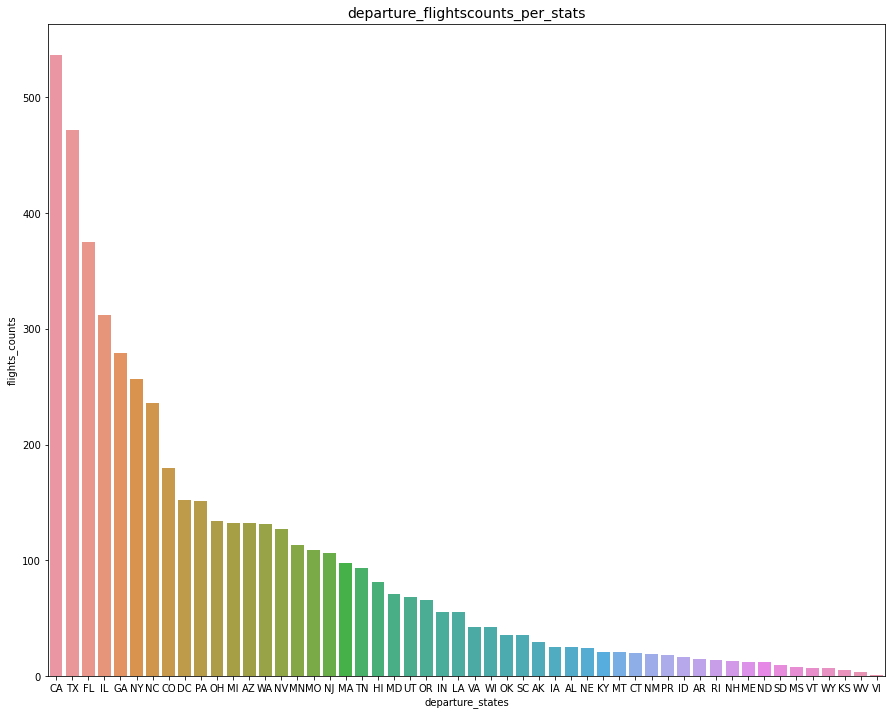

In [ ]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(y=departure_flightscounts_per_stats.values, x=departure_flightscounts_per_stats.index)
ax.set_title('departure_flightscounts_per_stats', fontsize=14)
ax.set_xlabel('departure_states')
ax.set_ylabel('flights_counts')

Text(0, 0.5, 'flights_counts')

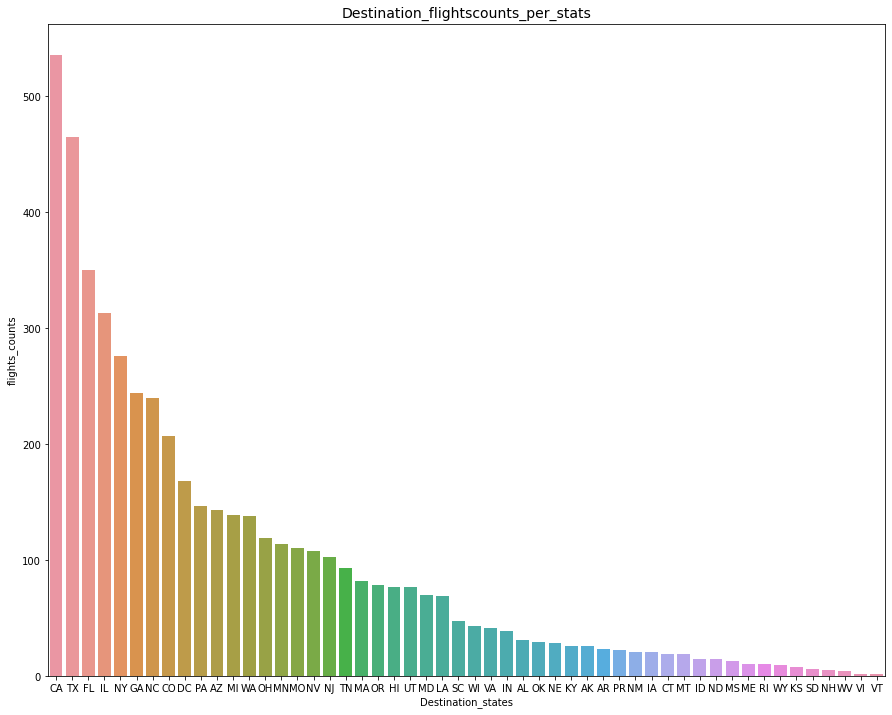

In [ ]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(y= Destination_flightscounts_per_stats.values, x=Destination_flightscounts_per_stats.index)
ax.set_title('Destination_flightscounts_per_stats', fontsize=14)
ax.set_xlabel('Destination_states')
ax.set_ylabel('flights_counts')

In [ ]:
flights_sum = Destination_flightscounts_per_stats + departure_flightscounts_per_stats
flight_perc = flights_sum.sum()*0.5


In [ ]:
fifty_percent_flight = flights_sum.sum()*0.5
fifty_percent_flight



5000.0

In [ ]:
states=[]
total=0
for state, flight in flights_sum.sort_values(ascending=False).items():
    if total<=fifty_percent_flight:
        states.append(state)
        total +=flight
        
print('The following states cover 50% of air traffic in US:')
for state in states:
    print(state)

The following states cover 50% of air traffic in US:
CA
TX
FL
IL
NY
GA
NC
CO


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [42]:
df_task7=df_flight.copy(deep=True)
df_task7.head()


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-05-20,UA,UA,UA,2042,UA,N77871,2042,11278,DCA,"Washington, DC",14771,SFO,"San Francisco, CA",753,812.0,19.0,15.0,827.0,1052.0,14.0,1100,1106.0,6.0,0.0,None,0.0,N,367.0,354.0,325.0,1.0,2442.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-11-08,AA,AA_CODESHARE,AA,4862,PT,N617AE,4862,11057,CLT,"Charlotte, NC",13139,LYH,"Lynchburg, VA",1300,1308.0,8.0,26.0,1334.0,1406.0,4.0,1403,1410.0,7.0,0.0,None,0.0,N,63.0,62.0,32.0,1.0,175.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-11-07,DL,DL,DL,2240,DL,N879DN,2240,10299,ANC,"Anchorage, AK",14747,SEA,"Seattle, WA",600,553.0,-7.0,10.0,603.0,1000.0,12.0,1041,1012.0,-29.0,0.0,None,0.0,N,221.0,199.0,177.0,1.0,1448.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-10,AA,AA,AA,1877,AA,N654AW,1877,11057,CLT,"Charlotte, NC",11697,FLL,"Fort Lauderdale, FL",1149,1151.0,2.0,32.0,1223.0,1346.0,4.0,1356,1350.0,-6.0,0.0,None,0.0,N,127.0,119.0,83.0,1.0,632.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-06,NK,NK,NK,814,NK,N639NK,814,14635,RSW,"Fort Myers, FL",10529,BDL,"Hartford, CT",2020,2025.0,5.0,12.0,2037.0,2316.0,8.0,2314,2324.0,10.0,0.0,,0.0,N,174.0,179.0,159.0,1.0,1180.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None


In [43]:
# speed = distance/Time
# Since the air-time is in minutes we must convert it into hours
df_task7['speed']  = (df_task7['distance']/df_task7['air_time'])*60

# We are going to examine if the mean speed  of delayed flight is greater than the mean speed of flight without delay
flightspeed_with_delay=df_task7.loc[(df_task7['dep_delay']>0), 'speed'].mean()
flightspeed_without_delay=df_task7.loc[(df_task7['dep_delay']==0), 'speed'].mean()

print(flightspeed_with_delay > flightspeed_without_delay)

True


So we can't reject the null hypotheis here

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [44]:
# for this question we just need three columns

df_task8 = df_flight[['fl_date', 'air_time','taxi_out', 'dep_time']]
df_task8.head()

,fl_date,air_time,taxi_out,dep_time
0,2018-05-20,325.0,15.0,812.0
1,2018-11-08,32.0,26.0,1308.0
2,2019-11-07,177.0,10.0,553.0
3,2019-03-10,83.0,32.0,1151.0
4,2018-01-06,159.0,12.0,2025.0


In [45]:
df_task8['dep_time'].fillna(0000, inplace=True)
df_task8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fl_date   5000 non-null   object 
 1   air_time  4875 non-null   float64
 2   taxi_out  4887 non-null   float64
 3   dep_time  5000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 156.4+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Short-haul (<3 hours)\n\nMedium-haul (3-6)\n\nLong-haul (6-12)\n\nUltra-long-haul (12+)'

In [46]:


import numpy as geek 

#This function convert any numrical values into hours and minutes format
def convert_time(x):
    # if x == np.nan:
    #     return '00:00'
    
    if x == 2400:
        return '23:59'   
    string = str(int(x))
    
    if len(string)< 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]


In [47]:
#get dep_hr again

df_task8['fl_date'] = pd.to_datetime(df_task8['fl_date'], format='%Y-%m-%d')

df_task8['dep_time'] = df_task8['dep_time'].apply(lambda x: convert_time(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df_task8.head()

,fl_date,air_time,taxi_out,dep_time
0,2018-05-20,325.0,15.0,08:12
1,2018-11-08,32.0,26.0,13:08
2,2019-11-07,177.0,10.0,05:53
3,2019-03-10,83.0,32.0,11:51
4,2018-01-06,159.0,12.0,20:25


In [49]:

df_task8['dep_time'] = pd.to_datetime(df_task8['dep_time'], format='%H:%M')
df_task8['dep_hr'] = df_task8['dep_time'].dt.hour



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Short-haul (<3 hours)\n\nMedium-haul (3-6)\n\nLong-haul (6-12)\n\nUltra-long-haul (12+)'

In [50]:
"""Short-haul (<3 hours)

Medium-haul (3-6)

Long-haul (6-12)

Ultra-long-haul (12+)"""


short_haul_flight=df_task8[df_task8['air_time']<=180]
medium_haul_flight=df_task8[(df_task8['air_time']> 180) & (df_task8['air_time']<=360)]
long_haul_flights=df_task8[df_task8['air_time']>=360]



In [51]:
short_flights = short_haul_flight.groupby(by=[short_haul_flight['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
med_flights = medium_haul_flight.groupby(by=[medium_haul_flight['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
long_flights = long_haul_flights.groupby(by=[long_haul_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)



/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:124: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



Text(0, 0.5, 'Flights_counts')

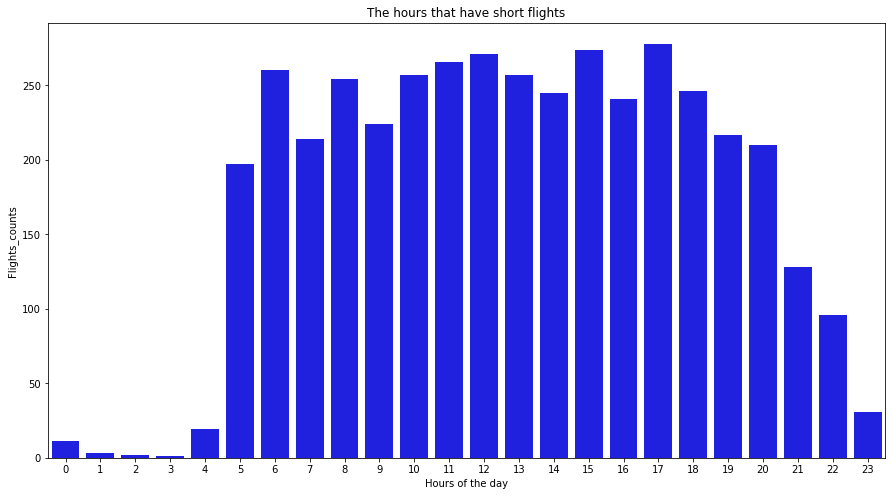

In [52]:
fig, ax=plt.subplots(figsize=(15, 8))

sns.barplot(ax=ax, x=short_flights.index, y=short_flights.values, color='B')
ax.set_title('The hours that have short flights')
ax.set_xlabel('Hours of the day')
ax.set_ylabel('Flights_counts')

Text(0, 0.5, 'Flights_counts')

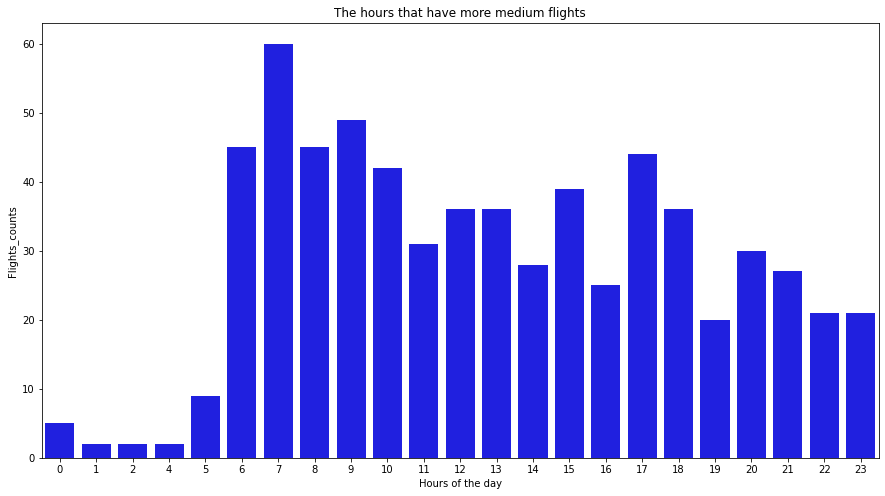

In [53]:
fig, ax=plt.subplots(figsize=(15, 8))

sns.barplot(ax=ax, x=med_flights.index, y=med_flights.values, color='B')
ax.set_title('The hours that have more medium flights')
ax.set_xlabel('Hours of the day')
ax.set_ylabel('Flights_counts')

Text(0, 0.5, 'Number of flights')

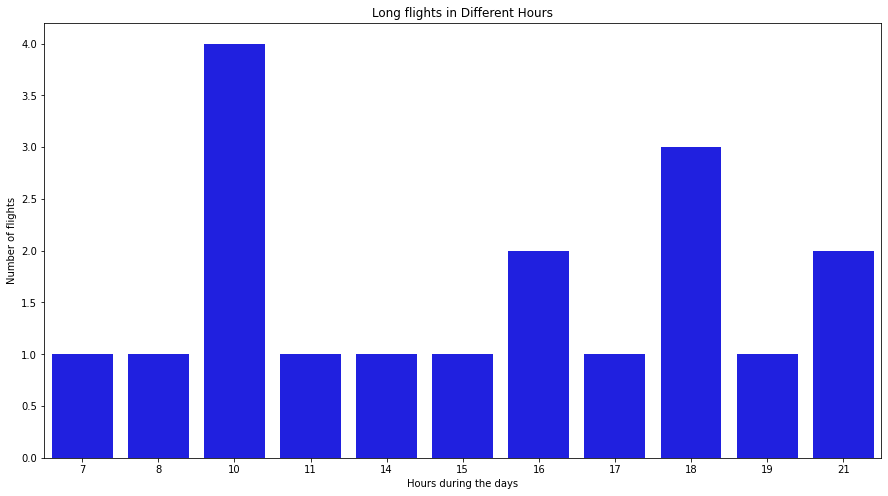

In [57]:
fig, ax=plt.subplots(figsize=(15, 8))

sns.barplot(ax=ax, x=long_flights.index, y=long_flights.values, color='b')
ax.set_title('Long flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [58]:
# Since the passanger column is not available in the current dataset, we have to query data from passanger dataset.

passenger_query = """
                    SELECT* FROM passengers
                    ORDER BY RANDOM()
                    LIMIT 5000;            
                   """
passenger_data = execute_read_query(con, passenger_query)
passenger_data

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,60.0,58.0,974400.0,3710.0,3153.0,441.0,59.0,1236.0,10875.0,9128.0,MQ,20398,Envoy Air,D,MQ,Envoy Air,3,3,13930,30977,ORD,"Chicago, IL",US,United States,11540,30615,ELP,"El Paso, TX",US,United States,6,631,1,2015,6,3,F,DU
1,3.0,3.0,61920.0,228.0,205.0,0.0,0.0,371.0,253.0,189.0,EV,20366,ExpressJet Airlines LLC,D,EV,ExpressJet Airlines Inc.,3,3,13230,32070,MDT,"Harrisburg, PA",US,United States,11433,31295,DTW,"Detroit, MI",US,United States,6,638,1,2015,6,1,F,DU
2,11.0,11.0,222310.0,854.0,601.0,0.0,0.0,447.0,1133.0,835.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,2,2,13495,33495,MSY,"New Orleans, LA",US,United States,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,6,638,1,2019,3,1,F,DU
3,0.0,14.0,456487.0,1876.0,1534.0,0.0,0.0,1019.0,0.0,0.0,WS,20229,Westjet,I,WS,Westjet,0,0,14771,32457,SFO,"San Francisco, CA",US,United States,16257,30863,YYC,"Calgary, Canada",CA,Canada,6,612,1,2018,9,3,F,IF
4,3.0,4.0,137784.0,504.0,401.0,56.0,0.0,509.0,533.0,379.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,12478,31703,JFK,"New York, NY",US,United States,11433,31295,DTW,"Detroit, MI",US,United States,6,698,1,2015,11,2,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,21.0,4481190.0,0.0,0.0,1178369.0,0.0,304.0,1429.0,1025.0,5Y,20007,Atlas Air Inc.,D,5Y,Atlas Air Inc.,3,3,14107,30466,PHX,"Phoenix, AZ",US,United States,14679,33570,SAN,"San Diego, CA",US,United States,6,625,2,2018,6,1,P,DU
4996,60.0,60.0,2406400.0,9600.0,8466.0,0.0,0.0,911.0,8885.0,7070.0,AA,19805,American Airlines Inc.,L,AA,American Airlines Inc.,3,3,12892,32575,LAX,"Los Angeles, CA",US,United States,14832,34832,SJD,"San Jose del Cabo, Mexico",MX,Mexico,6,614,1,2017,6,2,F,IU
4997,0.0,17.0,748000.0,3213.0,1667.0,0.0,0.0,2939.0,0.0,0.0,D8,21823,Norwegian Air International Ltd.,I,D8,Norwegian Air International Ltd.,0,0,14918,34918,SNN,"Shannon, Ireland",IE,Ireland,14307,30721,PVD,"Providence, RI",US,United States,6,838,1,2018,4,6,F,IF
4998,1.0,1.0,37200.0,180.0,176.0,0.0,0.0,1025.0,158.0,135.0,F9,20436,Frontier Airlines Inc.,D,F9,Frontier Airlines Inc.,3,3,14635,31714,RSW,"Fort Myers, FL",US,United States,11042,30647,CLE,"Cleveland, OH",US,United States,6,694,1,2018,1,3,F,DU


In [59]:
df_task9 = passenger_data.copy(deep = True)
df_task9.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [60]:
busiest_distination_airports = df_task9[['passengers', 'dest']].groupby('dest').sum().reset_index()
busiest_distination_airports

,dest,passengers
0,05A,3.0
1,1G4,145.0
2,A20,0.0
3,ABE,239.0
4,ABI,134.0
...,...,...
675,ZIH,2782.0
676,ZLO,812.0
677,ZRH,7694.0
678,ZXH,5.0


In [61]:
df_10_dest = df_task9['dest'].value_counts().sort_values(ascending = False).head(10)


Text(0, 0.5, 'flights counts')

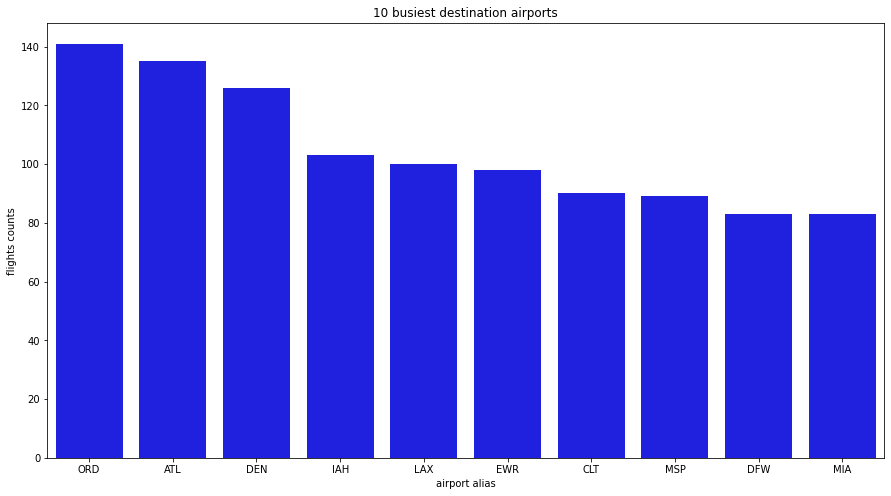

In [62]:
fig, ax=plt.subplots(figsize=(15, 8))

sns.barplot(ax=ax, x= df_10_dest.index, y=df_10_dest.values, color='b')
ax.set_title('10 busiest destination airports')
ax.set_xlabel('airport alias')
ax.set_ylabel('flights counts')

In [63]:
df_10_origin = df_task9['origin'].value_counts().sort_values(ascending = False).head(10)
df_10_origin

ORD    168
DEN    135
ATL    131
LAX    130
MSP     96
MIA     96
IAH     95
EWR     93
JFK     90
DTW     87
Name: origin, dtype: int64

Text(0, 0.5, 'flights counts')

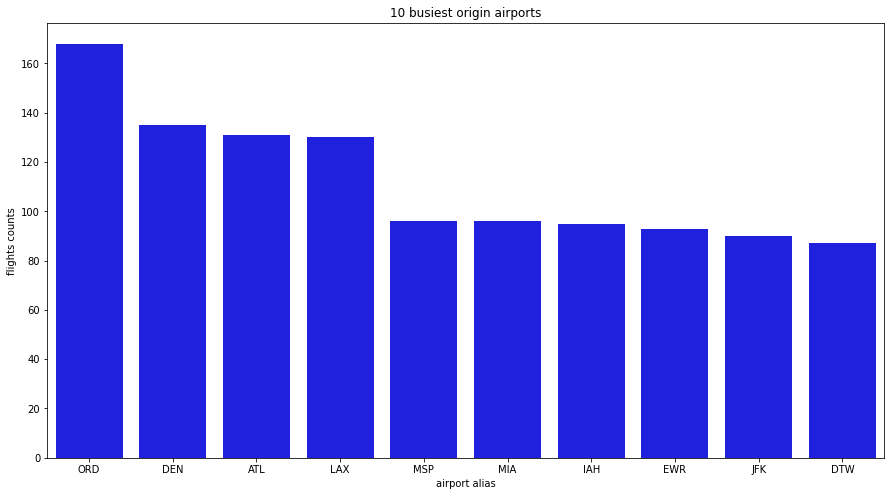

In [64]:
fig, ax=plt.subplots(figsize=(15, 8))

sns.barplot(ax=ax, x= df_10_origin.index, y=df_10_origin.values, color='b')
ax.set_title('10 busiest origin airports')
ax.set_xlabel('airport alias')
ax.set_ylabel('flights counts')

In [65]:
#passenger_dest = df_task9[['passengers', 'dest']].groupby('dest').sum().reset_index()
#passenger_dest

,dest,passengers
0,05A,3.0
1,1G4,145.0
2,A20,0.0
3,ABE,239.0
4,ABI,134.0
...,...,...
675,ZIH,2782.0
676,ZLO,812.0
677,ZRH,7694.0
678,ZXH,5.0


In [67]:
passenger_dest1 = df_task9.groupby('dest')['passengers'].sum().sort_values(ascending = False).head(10)
passenger_dest1



dest
ATL    632709.0
LAX    404132.0
ORD    383739.0
DFW    355748.0
DEN    340362.0
MCO    336159.0
SFO    326807.0
EWR    318781.0
JFK    297775.0
SEA    285313.0
Name: passengers, dtype: float64

Text(0, 0.5, 'number of passengers')

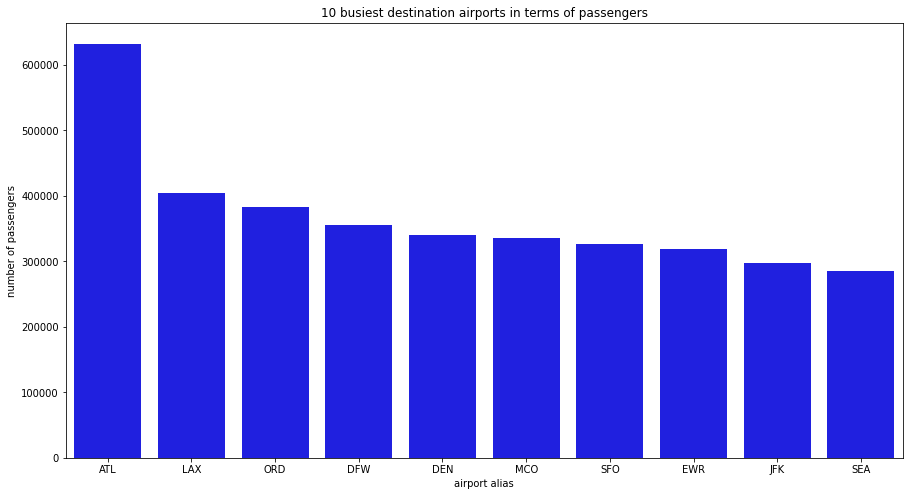

In [72]:

fig, ax=plt.subplots(figsize=(15, 8))
sns.barplot(ax=ax, x= passenger_dest1.index, y=passenger_dest1.values, color='b')
ax.set_title('10 busiest destination airports in terms of passengers')
ax.set_xlabel('airport alias')
ax.set_ylabel('number of passengers')

In [71]:
passenger_origin1 = df_task9.groupby('origin')['passengers'].sum().sort_values(ascending = False).head(10)
passenger_origin1

origin
ATL    553007.0
ORD    503643.0
LAX    441661.0
DEN    417599.0
DFW    342535.0
SFO    320764.0
CLT    302939.0
MCO    277183.0
JFK    267460.0
SEA    259179.0
Name: passengers, dtype: float64

Text(0, 0.5, 'number of passengers')

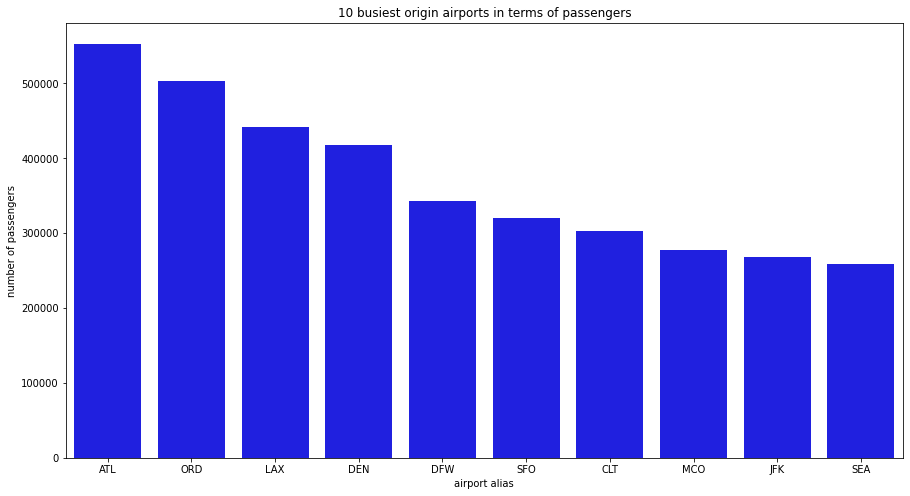

In [73]:
fig, ax=plt.subplots(figsize=(15, 8))
sns.barplot(ax=ax, x= passenger_origin1.index, y=passenger_origin1.values, color='b')
ax.set_title('10 busiest origin airports in terms of passengers')
ax.set_xlabel('airport alias')
ax.set_ylabel('number of passengers')

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [74]:
fuel_query = """
                    SELECT* FROM fuel_comsumption
                    ORDER BY RANDOM()
                    LIMIT 5000;            
                   """
fuel_data = execute_read_query(con, fuel_query)
fuel_data

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,10,21171.0,VX,VX,Virgin America,3,14514238.0,0.0,0.0,138449.0,138449.0,14652687.0,14580153.0,138449.0,14718602.0,23050250.0,0.0,0.0,226347.0,226347.0,23276597.0,23156297.0,226347.0,23382644.0,2015
1,6,20405.0,N8,N8,National Air Cargo Group Inc d/ba National Air...,1,56403.0,0.0,0.0,0.0,0.0,56403.0,209214.0,247808.0,457022.0,104383.0,0.0,0.0,0.0,0.0,104383.0,329849.0,466194.0,796043.0,2016
2,3,20151.0,M6,M6,Amerijet International,2,0.0,0.0,0.0,1550644.0,1550644.0,1550644.0,255821.0,1550644.0,1806465.0,0.0,0.0,0.0,2019253.0,2019253.0,2019253.0,333131.0,2019253.0,2352384.0,2016
3,7,20436.0,F9,F9,Frontier Airlines Inc.,3,15785361.0,0.0,0.0,1318787.0,1318787.0,17104148.0,15842648.0,1318787.0,17161435.0,29729783.0,0.0,0.0,2731927.0,2731927.0,32461710.0,29839564.0,2731927.0,32571491.0,2015
4,3,21650.0,EE,EE,Eastern Airlines Group Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,279440.0,194480.0,473920.0,0.0,0.0,0.0,0.0,0.0,0.0,416366.0,289775.0,706141.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,3,19917.0,5X,5X,United Parcel Service,3,35333000.0,10347000.0,16328000.0,3019000.0,29694000.0,65027000.0,35333000.0,29694000.0,65027000.0,39981000.0,10288000.0,17684000.0,3603000.0,31575000.0,71556000.0,39981000.0,31575000.0,71556000.0,2016
3031,3,19930.0,AS,AS,Alaska Airlines Inc.,3,59205964.0,0.0,0.0,1342907.0,1342907.0,60548871.0,59266999.0,1342907.0,60609906.0,131021319.0,0.0,0.0,3487341.0,3487341.0,134508660.0,131141759.0,3487341.0,134629100.0,2019
3032,5,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3033,9,20397.0,OH,OH,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015


In [77]:
df_fuel = fuel_data.copy(deep = True)
df_task10 = df_average.copy(deep = True)

In [76]:
# this part of the data comes from task 2

df_average['fl_date']=pd.to_datetime(df_average['fl_date'])
df_average['month']=df_average['fl_date'].dt.month_name()

df_average.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month
0,2018-05-20,UA,UA,UA,2042,UA,N77871,2042,11278,DCA,"Washington, DC",14771,SFO,"San Francisco, CA",753,812.0,19.0,15.0,827.0,1052.0,14.0,1100,1106.0,6.0,0.0,None,0.0,N,367.0,354.0,325.0,1.0,2442.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,May
1,2018-11-08,AA,AA_CODESHARE,AA,4862,PT,N617AE,4862,11057,CLT,"Charlotte, NC",13139,LYH,"Lynchburg, VA",1300,1308.0,8.0,26.0,1334.0,1406.0,4.0,1403,1410.0,7.0,0.0,None,0.0,N,63.0,62.0,32.0,1.0,175.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,November
2,2019-11-07,DL,DL,DL,2240,DL,N879DN,2240,10299,ANC,"Anchorage, AK",14747,SEA,"Seattle, WA",600,553.0,-7.0,10.0,603.0,1000.0,12.0,1041,1012.0,-29.0,0.0,None,0.0,N,221.0,199.0,177.0,1.0,1448.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,November
3,2019-03-10,AA,AA,AA,1877,AA,N654AW,1877,11057,CLT,"Charlotte, NC",11697,FLL,"Fort Lauderdale, FL",1149,1151.0,2.0,32.0,1223.0,1346.0,4.0,1356,1350.0,-6.0,0.0,None,0.0,N,127.0,119.0,83.0,1.0,632.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,March
4,2018-01-06,NK,NK,NK,814,NK,N639NK,814,14635,RSW,"Fort Myers, FL",10529,BDL,"Hartford, CT",2020,2025.0,5.0,12.0,2037.0,2316.0,8.0,2314,2324.0,10.0,0.0,,0.0,N,174.0,179.0,159.0,1.0,1180.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None,January


In [80]:
#Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

monthly_delay_ave = df_task10.groupby(['month', 'mkt_unique_carrier'])['dep_delay'].mean()



In [81]:
monthly_delay_ave

month      mkt_unique_carrier
April      AA                     5.472527
           AS                     2.655172
           B6                     7.800000
           DL                    12.560976
           F9                    22.000000
                                   ...    
September  G4                   -14.000000
           HA                     2.666667
           NK                    -5.000000
           UA                     8.894118
           WN                     4.596774
Name: dep_delay, Length: 122, dtype: float64

In [101]:
#Find out distance covered monthly by different air carriers
monthly_distance_sum = df_task10.groupby(['month','mkt_unique_carrier'])['distance'].sum()
monthly_distance_sum

month      mkt_unique_carrier
April      AA                    63263.0
           AS                    32692.0
           B6                    15875.0
           DL                    58788.0
           F9                    10285.0
                                  ...   
September  G4                      942.0
           HA                      272.0
           NK                     8113.0
           UA                    74445.0
           WN                    50498.0
Name: distance, Length: 122, dtype: float64

In [84]:
#Find out number of passengers that were carried by different air carriers

df_task9.head(6)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,60.0,58.0,974400.0,3710.0,3153.0,441.0,59.0,1236.0,10875.0,9128.0,MQ,20398,Envoy Air,D,MQ,Envoy Air,3,3,13930,30977,ORD,"Chicago, IL",US,United States,11540,30615,ELP,"El Paso, TX",US,United States,6,631,1,2015,6,3,F,DU
1,3.0,3.0,61920.0,228.0,205.0,0.0,0.0,371.0,253.0,189.0,EV,20366,ExpressJet Airlines LLC,D,EV,ExpressJet Airlines Inc.,3,3,13230,32070,MDT,"Harrisburg, PA",US,United States,11433,31295,DTW,"Detroit, MI",US,United States,6,638,1,2015,6,1,F,DU
2,11.0,11.0,222310.0,854.0,601.0,0.0,0.0,447.0,1133.0,835.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,2,2,13495,33495,MSY,"New Orleans, LA",US,United States,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,6,638,1,2019,3,1,F,DU
3,0.0,14.0,456487.0,1876.0,1534.0,0.0,0.0,1019.0,0.0,0.0,WS,20229,Westjet,I,WS,Westjet,0,0,14771,32457,SFO,"San Francisco, CA",US,United States,16257,30863,YYC,"Calgary, Canada",CA,Canada,6,612,1,2018,9,3,F,IF
4,3.0,4.0,137784.0,504.0,401.0,56.0,0.0,509.0,533.0,379.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,12478,31703,JFK,"New York, NY",US,United States,11433,31295,DTW,"Detroit, MI",US,United States,6,698,1,2015,11,2,F,DU
5,0.0,1.0,21502.0,76.0,46.0,0.0,0.0,443.0,91.0,68.0,9E,20363,Endeavor Air Inc.,D,9E,Endeavor Air Inc.,2,2,15412,35412,TYS,"Knoxville, TN",US,United States,11433,31295,DTW,"Detroit, MI",US,United States,6,638,1,2018,12,1,F,DU


In [89]:

passenger_carried = df_task9.groupby(['unique_carrier'])['passengers'].sum().sort_values(ascending = False).head(10)
passenger_carried

unique_carrier
DL    1798936.0
AA    1738492.0
WN    1727065.0
UA    1188679.0
OO     387015.0
B6     341573.0
NK     314726.0
AS     289069.0
F9     186112.0
YX     185971.0
Name: passengers, dtype: float64

In [90]:
# Find out total fuel comsumption per air carrier.

df_fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,10,21171.0,VX,VX,Virgin America,3,14514238.0,0.0,0.0,138449.0,138449.0,14652687.0,14580153.0,138449.0,14718602.0,23050250.0,0.0,0.0,226347.0,226347.0,23276597.0,23156297.0,226347.0,23382644.0,2015
1,6,20405.0,N8,N8,National Air Cargo Group Inc d/ba National Air...,1,56403.0,0.0,0.0,0.0,0.0,56403.0,209214.0,247808.0,457022.0,104383.0,0.0,0.0,0.0,0.0,104383.0,329849.0,466194.0,796043.0,2016
2,3,20151.0,M6,M6,Amerijet International,2,0.0,0.0,0.0,1550644.0,1550644.0,1550644.0,255821.0,1550644.0,1806465.0,0.0,0.0,0.0,2019253.0,2019253.0,2019253.0,333131.0,2019253.0,2352384.0,2016
3,7,20436.0,F9,F9,Frontier Airlines Inc.,3,15785361.0,0.0,0.0,1318787.0,1318787.0,17104148.0,15842648.0,1318787.0,17161435.0,29729783.0,0.0,0.0,2731927.0,2731927.0,32461710.0,29839564.0,2731927.0,32571491.0,2015
4,3,21650.0,EE,EE,Eastern Airlines Group Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,279440.0,194480.0,473920.0,0.0,0.0,0.0,0.0,0.0,0.0,416366.0,289775.0,706141.0,2016


In [110]:
Total_fuel_consumption_gallon = df_fuel.groupby(['unique_carrier'])['total_gallons'].sum().sort_values(ascending = False).head(10)
Total_fuel_consumption_gallon

unique_carrier
AA    1.663489e+10
DL    1.655025e+10
UA    1.595691e+10
WN    9.599040e+09
FX    5.464666e+09
5X    3.881982e+09
B6    3.767060e+09
AS    2.678455e+09
5Y    2.152912e+09
NK    1.663308e+09
Name: total_gallons, dtype: float64

Text(0, 0.5, 'total_fuel_consumption in terms of gallon')

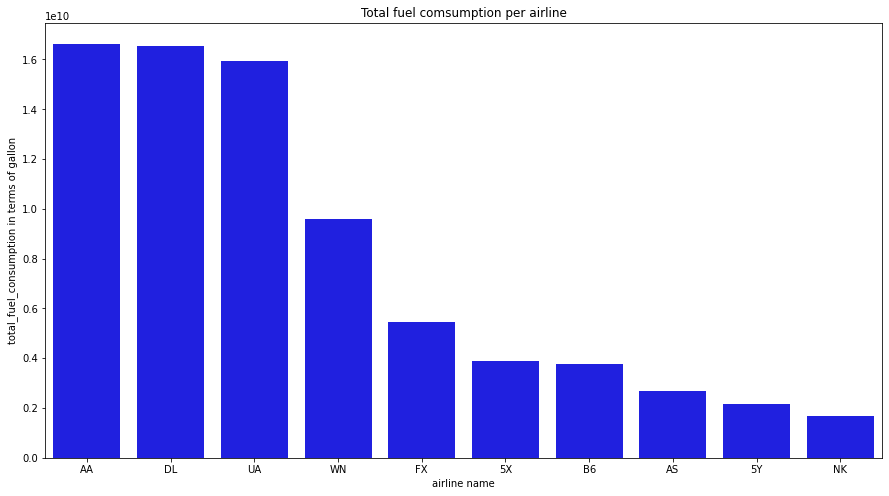

In [111]:
fig, ax=plt.subplots(figsize=(15, 8))
sns.barplot(ax=ax, x= Total_fuel_consumption_gallon.index, y=Total_fuel_consumption_gallon.values, color='b')
ax.set_title('Total fuel comsumption per airline')
ax.set_xlabel('airline name')
ax.set_ylabel('total_fuel_consumption in terms of gallon')

In [ ]:
#Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [112]:
df_merged1 = pd.merge(monthly_delay_ave, monthly_distance_sum, how='left', on=['mkt_unique_carrier', 'month']).reset_index()
df_merged1

,mkt_unique_carrier,month,dep_delay,distance
0,AA,April,5.472527,63263.0
1,AS,April,2.655172,32692.0
2,B6,April,7.800000,15875.0
3,DL,April,12.560976,58788.0
4,F9,April,22.000000,10285.0
...,...,...,...,...
117,G4,September,-14.000000,942.0
118,HA,September,2.666667,272.0
119,NK,September,-5.000000,8113.0
120,UA,September,8.894118,74445.0


In [113]:
df_merged1 = df_merged1.rename(columns={'mkt_unique_carrier': 'unique_carrier'})
df_merged1

,unique_carrier,month,dep_delay,distance
0,AA,April,5.472527,63263.0
1,AS,April,2.655172,32692.0
2,B6,April,7.800000,15875.0
3,DL,April,12.560976,58788.0
4,F9,April,22.000000,10285.0
...,...,...,...,...
117,G4,September,-14.000000,942.0
118,HA,September,2.666667,272.0
119,NK,September,-5.000000,8113.0
120,UA,September,8.894118,74445.0


In [116]:
# Here we need to do the second merge
df_merged2 = pd.merge(df_merged1, Total_fuel_consumption_gallon, how='left', on=['unique_carrier'])
df_merged2

,unique_carrier,month,dep_delay,distance,total_gallons
0,AA,April,5.472527,63263.0,1.663489e+10
1,AS,April,2.655172,32692.0,2.678455e+09
2,B6,April,7.800000,15875.0,3.767060e+09
3,DL,April,12.560976,58788.0,1.655025e+10
4,F9,April,22.000000,10285.0,NaN
...,...,...,...,...,...
117,G4,September,-14.000000,942.0,NaN
118,HA,September,2.666667,272.0,NaN
119,NK,September,-5.000000,8113.0,1.663308e+09
120,UA,September,8.894118,74445.0,1.595691e+10


In [119]:
# we are going to do the third merge
df_merge3 = pd.merge(df_merged2, passenger_carried, how='left', on=['unique_carrier'])

df_merge3


,unique_carrier,month,dep_delay,distance,total_gallons,passengers
0,AA,April,5.472527,63263.0,1.663489e+10,1738492.0
1,AS,April,2.655172,32692.0,2.678455e+09,289069.0
2,B6,April,7.800000,15875.0,3.767060e+09,341573.0
3,DL,April,12.560976,58788.0,1.655025e+10,1798936.0
4,F9,April,22.000000,10285.0,NaN,186112.0
...,...,...,...,...,...,...
117,G4,September,-14.000000,942.0,NaN,NaN
118,HA,September,2.666667,272.0,NaN,NaN
119,NK,September,-5.000000,8113.0,1.663308e+09,314726.0
120,UA,September,8.894118,74445.0,1.595691e+10,1188679.0


In [135]:
#Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

ave_fuel_consumption_passenger =  (df_merge3['total_gallons']/df_merge3['passengers']).mean()
ave_fuel_consumption_passenger
print(f'Average fuel consumption per passenger: {ave_fuel_consumption_passenger}')



Average fuel consumption per passenger: 9047.138731973855


In [136]:
#average fuel comsumption pr km
ave_fuel_consumption_km =  (df_merge3['total_gallons']/df_merge3['distance']).mean()
ave_fuel_consumption_km
print(f'Average fuel consumption per km: {ave_fuel_consumption_km}')

Average fuel consumption per km: 220157.58985333244
